#Evoimpy Algorítmo - Tratamento de Valores Ausentes

A **Missing data** é um problema recorrente nas análises dados do mundo real. Quando não tratados de maneira adequada, os resultados finais podem ser seriamente comprometidos. Visando contornar essa questão, os **métodos de imputação** buscam valores plausíveis para preencher esses dados faltantes. Dependendo do desempenho do método, por exemplo, o classificador também tem ganho de performance quando tais analises são aplicadas em tarefas de classificação. O algorítmo em questão foca no cenário da **Classificação Multilabel (CM)**. A CM é um problema de aprendizado supervisionado onde uma instância pode estar associada a múltiplos rótulos,  diferente da classificação tradicional/simples que associa um exemplo a um único, aumentando assim a complexidade. São exemplos de aplicações com CM:  anotações semânticas de vídeos e imagens, categorização de música e diagnósticos médicos. 
O evoimpy é um algorítmo de **Imputação Multipla** de dados baseado em **algoritmos genéticos**. Aqui, os indivíduos (dataset completo, neste caso) são avaliado mediante o desempenho de Classificadores Multilabel. 
Neste notebook é apresentado  a implementação do algorítmo, em Python, utilizando datasets multilabel do repositorio Mulan. Este repositório disponibiliza vários datasets para o cenário pretendido.
No experimento é destribuído percentuais de missing values e verificado o desempenho do Evoimpy.
Como mecanismo de ausência de dados é utilzado *Missing Completely At Random* nos experimentos.

datasets multilabel: yeast, scene, emotions, birds
amputacoes: 10,20,30

#Importações


In [1]:
import numpy as np
import scipy as sp
import future as ft
import sklearn
from scipy.io import arff
import pandas as pd

#instalações
!pip install scikit-multilearn
!pip install liac-arff # for loading ARFF files

#importações poś-intalações
from skmultilearn.dataset import load_dataset
import arff


#Lendo datasets originais do Repositório Mulan





In [444]:
dataset_name = 'scene'
from skmultilearn.dataset import load_dataset
X,y,feature_names, label_names = load_dataset(dataset_name, 'undivided')

scene:undivided - does not exists downloading
Downloaded scene-undivided


In [445]:
X.toarray()
y.toarray()

array([[1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [446]:
feature_names

[('Att1', 'NUMERIC'),
 ('Att2', 'NUMERIC'),
 ('Att3', 'NUMERIC'),
 ('Att4', 'NUMERIC'),
 ('Att5', 'NUMERIC'),
 ('Att6', 'NUMERIC'),
 ('Att7', 'NUMERIC'),
 ('Att8', 'NUMERIC'),
 ('Att9', 'NUMERIC'),
 ('Att10', 'NUMERIC'),
 ('Att11', 'NUMERIC'),
 ('Att12', 'NUMERIC'),
 ('Att13', 'NUMERIC'),
 ('Att14', 'NUMERIC'),
 ('Att15', 'NUMERIC'),
 ('Att16', 'NUMERIC'),
 ('Att17', 'NUMERIC'),
 ('Att18', 'NUMERIC'),
 ('Att19', 'NUMERIC'),
 ('Att20', 'NUMERIC'),
 ('Att21', 'NUMERIC'),
 ('Att22', 'NUMERIC'),
 ('Att23', 'NUMERIC'),
 ('Att24', 'NUMERIC'),
 ('Att25', 'NUMERIC'),
 ('Att26', 'NUMERIC'),
 ('Att27', 'NUMERIC'),
 ('Att28', 'NUMERIC'),
 ('Att29', 'NUMERIC'),
 ('Att30', 'NUMERIC'),
 ('Att31', 'NUMERIC'),
 ('Att32', 'NUMERIC'),
 ('Att33', 'NUMERIC'),
 ('Att34', 'NUMERIC'),
 ('Att35', 'NUMERIC'),
 ('Att36', 'NUMERIC'),
 ('Att37', 'NUMERIC'),
 ('Att38', 'NUMERIC'),
 ('Att39', 'NUMERIC'),
 ('Att40', 'NUMERIC'),
 ('Att41', 'NUMERIC'),
 ('Att42', 'NUMERIC'),
 ('Att43', 'NUMERIC'),
 ('Att44', 'NUMERIC'

In [447]:
label_names

[('Beach', ['0', '1']),
 ('Sunset', ['0', '1']),
 ('FallFoliage', ['0', '1']),
 ('Field', ['0', '1']),
 ('Mountain', ['0', '1']),
 ('Urban', ['0', '1'])]

In [448]:
df_features = pd.DataFrame(X.toarray())
df_labels = pd.DataFrame(y.toarray())
df_labels

,0,1,2,3,4,5
0,1,0,0,0,1,0
1,1,0,0,0,0,1
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
2402,0,0,0,0,0,1
2403,0,0,0,0,0,1
2404,0,0,0,0,0,1
2405,0,0,0,0,0,1


In [449]:
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix

In [450]:
from collections import Counter
Counter(combination for row in get_combination_wise_output_matrix(y.A, order=1) for combination in row)

Counter({(0,): 427, (1,): 364, (2,): 397, (3,): 433, (4,): 533, (5,): 431})




## Aplicando Validação Cruzada k-fold 
Testes iniciais com 10-folds

In [451]:
!pip install iterative-stratification
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

In [452]:

mskf = MultilabelStratifiedKFold(n_splits=10, shuffle=True, random_state=0)

for train_index, test_index in mskf.split(X.toarray(), y.toarray()):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]

TRAIN: [   0    1    3 ... 2403 2405 2406] TEST: [   2   13   17   57   67   84   86  104  118  123  131  132  142  148
  162  167  168  170  179  186  195  203  208  213  217  224  227  229
  232  242  244  250  252  258  271  283  286  297  306  309  328  360
  389  393  413  436  450  452  456  504  512  526  544  548  551  558
  563  576  581  592  598  605  606  616  629  630  637  658  664  672
  675  681  692  701  703  711  728  737  744  771  788  807  819  826
  832  838  841  843  849  862  868  877  887  888  929  955  967  971
  974  982  987  988 1018 1028 1029 1103 1105 1106 1107 1120 1122 1125
 1161 1162 1164 1185 1186 1192 1200 1208 1218 1265 1273 1286 1315 1330
 1331 1334 1361 1370 1383 1384 1387 1388 1391 1403 1410 1412 1448 1449
 1475 1481 1488 1496 1519 1536 1543 1572 1577 1579 1583 1591 1596 1597
 1601 1604 1617 1619 1621 1623 1630 1640 1658 1671 1674 1688 1700 1710
 1728 1749 1759 1760 1762 1783 1784 1788 1797 1799 1801 1809 1818 1828
 1850 1870 1876 1881 1882 18

#Exibindo informações do dataset trabalhado

In [453]:
f =np.array(feature_names)
features = pd.DataFrame(f)
features_x = features = features.iloc[:,0]
features_x


0        Att1
1        Att2
2        Att3
3        Att4
4        Att5
        ...  
289    Att290
290    Att291
291    Att292
292    Att293
293    Att294
Name: 0, Length: 294, dtype: object

In [454]:
dX_train = X_train.toarray()
dy_train = y_train.toarray() 
dX_train


#print(pd.DataFrame(X.toarray()).astype(float))

array([[0.646467, 0.666435, 0.685047, ..., 0.247298, 0.014025, 0.029709],
       [0.770156, 0.767255, 0.761053, ..., 0.137833, 0.082672, 0.03632 ],
       [0.793984, 0.772096, 0.76182 , ..., 0.051125, 0.112506, 0.083924],
       ...,
       [0.875782, 0.901653, 0.926227, ..., 0.279607, 0.254413, 0.13435 ],
       [0.952281, 0.944987, 0.905556, ..., 0.0319  , 0.017547, 0.019734],
       [0.88399 , 0.899004, 0.901019, ..., 0.256158, 0.226332, 0.22307 ]])

In [455]:
df = pd.DataFrame(dX_train)
dfy = pd.DataFrame(dy_train)
df_origin = df
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293
0,0.646467,0.666435,0.685047,0.699053,0.652746,0.407864,0.150309,0.535193,0.555689,0.580782,0.577094,0.390455,0.242458,0.170217,0.421797,0.428206,0.428277,0.490017,0.459252,0.350897,0.255987,0.310109,0.375018,0.437369,0.451752,0.508325,0.467347,0.567068,0.546262,0.566969,0.612951,0.621101,0.653561,0.694546,0.574777,0.710196,0.614510,0.590450,0.508313,0.645884,...,0.185948,0.412370,0.204738,0.083212,0.096029,0.026930,0.069331,0.136652,0.136285,0.127585,0.249868,0.545665,0.252143,0.261571,0.203095,0.172747,0.239030,0.309251,0.090241,0.048767,0.085062,0.072274,0.167601,0.094636,0.258751,0.092845,0.477150,0.224848,0.102568,0.329816,0.061538,0.049615,0.068962,0.653879,0.354982,0.124074,0.157332,0.247298,0.014025,0.029709
1,0.770156,0.767255,0.761053,0.745630,0.742231,0.688086,0.708416,0.757351,0.760633,0.740314,0.513377,0.600421,0.542340,0.439594,0.604272,0.624697,0.642823,0.424883,0.448578,0.318076,0.209851,0.570696,0.599071,0.556610,0.556215,0.653352,0.559962,0.473784,0.636677,0.653249,0.621813,0.613890,0.596795,0.596297,0.692224,0.634007,0.605896,0.594992,0.650470,0.582844,...,0.016475,0.159426,0.131570,0.138887,0.170231,0.070917,0.088278,0.097577,0.167246,0.193839,0.283507,0.190554,0.072342,0.111906,0.175488,0.178064,0.249890,0.085085,0.073259,0.133331,0.090761,0.138334,0.102932,0.406639,0.126982,0.046562,0.354085,0.199359,0.157326,0.051859,0.114123,0.160008,0.414088,0.361843,0.303399,0.176387,0.251454,0.137833,0.082672,0.036320
2,0.793984,0.772096,0.761820,0.762213,0.740569,0.734361,0.722677,0.849128,0.839607,0.812746,0.785767,0.760288,0.751835,0.754508,0.853808,0.857499,0.858505,0.864827,0.865957,0.867185,0.872483,0.955915,0.966291,0.968941,0.879657,0.716114,0.479571,0.402155,0.754620,0.775176,0.723823,0.676656,0.633313,0.552341,0.417900,0.622198,0.652387,0.648123,0.680452,0.662322,...,0.014701,0.013867,0.009130,0.010121,0.018168,0.064507,0.082237,0.060296,0.058945,0.052964,0.062245,0.075563,0.006149,0.004046,0.006033,0.181837,0.213608,0.122532,0.035184,0.025505,0.027821,0.353377,0.073733,0.048943,0.080248,0.074113,0.051372,0.024035,0.015971,0.028559,0.047596,0.038082,0.079977,0.004901,0.003460,0.006049,0.017166,0.051125,0.112506,0.083924
3,0.938563,0.949260,0.955621,0.966743,0.968649,0.869619,0.696925,0.953460,0.959631,0.966320,0.972766,0.916497,0.622508,0.530428,0.963539,0.972303,0.972980,0.945388,0.609497,0.514073,0.360757,0.804240,0.827367,0.813407,0.796413,0.753638,0.696435,0.520342,0.782931,0.774347,0.750613,0.706845,0.612971,0.647101,0.645833,0.736683,0.719352,0.643989,0.705878,0.773725,...,0.008305,0.003958,0.030881,0.068354,0.085017,0.000906,0.000563,0.008393,0.093743,0.105665,0.060825,0.025972,0.045153,0.039900,0.030980,0.448542,0.024508,0.024751,0.045848,0.020989,0.015197,0.209978,0.138788,0.031173,0.032565,0.034237,0.018757,0.082271,0.201563,0.043669,0.027527,0.016922,0.024174,0.036799,0.007694,0.009735,0.019267,0.031290,0.049780,0.090959
4,0.512130,0.524684,0.520020,0.504467,0.471209,0.417654,0.364292,0.562266,0.588592,0.584449,0.570074,0.551043,0.503925,0.447526,0.500117,0.539517,0.588721,0.600226,0.588937,0.562027,0.510786,0.465298,0.626580,0.649661,0.629969,0.574756,0.519651,0.445292,0.450048,0.742275,0.784539,0.903786,0.834243,0.766266,0.657113,0.276264,0.394086,0.610411,0.698119,0.743710,...,0.009433,0.007340,0.010177,0.013087,0.007811,0.381498,0.439771,0.595821,0.207690,0.028206,0.010644,0.010589,0.138157,0.094097,0.044848,0.036629,0.046537,0.090652,0.086531,0.293732,0.221770,0.094467,0.143500,0.186763,0.074600,0.043375,0.208570,0.188324,0.413413,0.387559,0.158730,0.023177,0.129994,0.167709,0.226580,0.218534,0.198151,0.238796,0.164270,0.184290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [456]:
va = (df.isna().sum()).sum()
va

0

padronização Dataset de teste

In [457]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X_test = scl.fit_transform(X_test.toarray())

In [458]:
X_test

array([[ 1.07738471,  1.10823948,  1.17041729, ..., -0.39609755,
        -0.19359719, -0.41181989],
       [-0.40656795, -0.05434483, -1.1372748 , ..., -0.7130051 ,
        -0.33413651, -0.53643581],
       [ 0.64534651,  0.60767849,  0.61521042, ..., -0.58701964,
         0.09579095,  0.24790195],
       ...,
       [ 0.0512199 ,  0.651622  ,  0.57580373, ..., -0.1337767 ,
         0.36185713,  0.01624548],
       [ 0.00644354, -0.09114791, -0.08562034, ...,  0.55746213,
        -0.42803864, -0.48076543],
       [ 1.53517738,  0.9199748 ,  0.60389265, ..., -0.71894186,
        -0.58793755, -0.72357277]])

#Amputando dataset

*   Mecanismo VA: MCAR



Quantificando os percentuais de valores ausentes de acordo com cada database

In [459]:
#rate - taxa de Missing values - em float (ex.: 0.5 == 50%)
#data_size = quantidade de dados na matriz (col*rows)
def amount_ampute(rate, data_size):
  amount_missing_values = data_size * rate
  return int(amount_missing_values)


In [460]:
dX_train.size

635628

In [461]:
#calcula o percentual de valores ausentes a serem aplicados no dataset
def amount_missing_values(rate,df_x_size):
  amount_mv = amount_ampute(rate, df_x_size)
  print('Total de dados: ',df_x_size,'\nTotal de Valores Ausentes: ',amount_mv)
  return amount_mv



In [462]:
taxa_de_missing_values = 0.10
missing_values = amount_missing_values(taxa_de_missing_values, dX_train.size)

Total de dados:  635628 
Total de Valores Ausentes:  63562


In [463]:
type(missing_values)

int

Adicionado amputações de acordo com a quantidade estabelecida no passo anterior

In [464]:
from numpy import random
def selectIndex(x,y):
  return random.randint(0,x), random.randint(0,y)

In [465]:
#rows e cols são os tamanhos dos ranges percorridos para x e y
rows = X_train.shape[0]
cols = X_train.shape[1]
indexList = []

In [466]:
def ampute(i,j): 
  while(len(indexList)<missing_values):
    a = 0
    b = 0
    r,c= selectIndex(i,j)
    if(a != r and b != c):
      a = r
      b = c
      df.iloc[r,c] = np.nan
      indexList.append([r,c])
  return indexList


In [467]:
list_positions_missing_values = ampute(rows,cols)

In [468]:
len(indexList), len(list_positions_missing_values)

(63562, 63562)

In [469]:
list_positions_missing_values

[[1602, 10],
 [1405, 269],
 [905, 228],
 [447, 225],
 [633, 178],
 [1169, 95],
 [1377, 94],
 [1188, 37],
 [1789, 155],
 [1287, 150],
 [1713, 239],
 [533, 234],
 [1649, 38],
 [4, 262],
 [1186, 50],
 [1328, 224],
 [1918, 134],
 [28, 29],
 [83, 17],
 [1284, 253],
 [8, 6],
 [1354, 207],
 [1009, 43],
 [939, 217],
 [143, 269],
 [749, 167],
 [122, 182],
 [1848, 241],
 [1239, 225],
 [1140, 109],
 [1835, 189],
 [1715, 40],
 [1891, 132],
 [568, 118],
 [975, 170],
 [1654, 43],
 [1567, 77],
 [1428, 141],
 [1701, 158],
 [626, 3],
 [1234, 212],
 [155, 190],
 [103, 275],
 [458, 220],
 [1628, 265],
 [2064, 41],
 [888, 40],
 [1469, 165],
 [1436, 82],
 [678, 57],
 [1679, 256],
 [344, 234],
 [1736, 206],
 [1600, 92],
 [1258, 233],
 [1218, 44],
 [637, 198],
 [190, 16],
 [2066, 102],
 [1019, 106],
 [832, 92],
 [232, 78],
 [831, 42],
 [1150, 53],
 [1565, 49],
 [2034, 35],
 [1618, 172],
 [39, 95],
 [881, 81],
 [1394, 182],
 [1715, 124],
 [2102, 129],
 [435, 279],
 [1510, 244],
 [1334, 68],
 [528, 49],
 [828,

In [470]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293
0,0.646467,0.666435,0.685047,0.699053,0.652746,0.407864,0.150309,0.535193,0.555689,0.580782,0.577094,0.390455,0.242458,0.170217,0.421797,0.428206,0.428277,0.490017,0.459252,0.350897,0.255987,0.310109,0.375018,0.437369,0.451752,0.508325,0.467347,0.567068,0.546262,0.566969,0.612951,0.621101,0.653561,0.694546,0.574777,0.710196,0.614510,0.590450,0.508313,0.645884,...,0.185948,0.412370,0.204738,0.083212,0.096029,0.026930,0.069331,0.136652,0.136285,0.127585,0.249868,0.545665,0.252143,0.261571,0.203095,0.172747,0.239030,0.309251,0.090241,0.048767,0.085062,0.072274,0.167601,0.094636,0.258751,0.092845,0.477150,0.224848,0.102568,0.329816,0.061538,0.049615,0.068962,0.653879,0.354982,0.124074,0.157332,0.247298,0.014025,0.029709
1,0.770156,0.767255,0.761053,NaN,0.742231,0.688086,0.708416,0.757351,0.760633,0.740314,NaN,0.600421,0.542340,0.439594,0.604272,0.624697,0.642823,0.424883,NaN,0.318076,0.209851,NaN,0.599071,0.556610,0.556215,0.653352,0.559962,0.473784,0.636677,0.653249,0.621813,0.613890,NaN,0.596297,0.692224,0.634007,0.605896,0.594992,NaN,0.582844,...,0.016475,0.159426,0.131570,0.138887,0.170231,0.070917,0.088278,0.097577,0.167246,0.193839,0.283507,0.190554,0.072342,0.111906,NaN,0.178064,0.249890,0.085085,0.073259,0.133331,0.090761,0.138334,0.102932,0.406639,0.126982,0.046562,0.354085,0.199359,NaN,0.051859,0.114123,0.160008,0.414088,0.361843,NaN,0.176387,0.251454,0.137833,0.082672,0.036320
2,0.793984,0.772096,0.761820,0.762213,0.740569,0.734361,0.722677,0.849128,0.839607,0.812746,0.785767,0.760288,0.751835,0.754508,0.853808,0.857499,0.858505,NaN,0.865957,0.867185,0.872483,0.955915,NaN,0.968941,0.879657,0.716114,0.479571,0.402155,0.754620,0.775176,0.723823,NaN,0.633313,0.552341,0.417900,0.622198,0.652387,0.648123,0.680452,0.662322,...,0.014701,0.013867,NaN,0.010121,0.018168,0.064507,0.082237,0.060296,0.058945,0.052964,0.062245,0.075563,0.006149,0.004046,0.006033,0.181837,0.213608,0.122532,0.035184,0.025505,0.027821,0.353377,0.073733,0.048943,0.080248,0.074113,0.051372,0.024035,0.015971,0.028559,NaN,0.038082,0.079977,0.004901,0.003460,0.006049,NaN,0.051125,0.112506,NaN
3,0.938563,0.949260,0.955621,0.966743,0.968649,0.869619,0.696925,0.953460,0.959631,NaN,0.972766,0.916497,0.622508,0.530428,0.963539,NaN,0.972980,0.945388,0.609497,0.514073,0.360757,0.804240,0.827367,0.813407,0.796413,0.753638,NaN,NaN,0.782931,0.774347,0.750613,0.706845,0.612971,0.647101,0.645833,0.736683,0.719352,0.643989,NaN,0.773725,...,0.008305,0.003958,0.030881,0.068354,0.085017,0.000906,0.000563,NaN,0.093743,0.105665,0.060825,0.025972,0.045153,0.039900,0.030980,0.448542,0.024508,0.024751,0.045848,0.020989,0.015197,0.209978,0.138788,0.031173,0.032565,0.034237,0.018757,0.082271,0.201563,0.043669,0.027527,0.016922,0.024174,0.036799,0.007694,0.009735,0.019267,0.031290,0.049780,0.090959
4,0.512130,0.524684,0.520020,0.504467,NaN,0.417654,0.364292,0.562266,0.588592,0.584449,0.570074,0.551043,0.503925,0.447526,NaN,0.539517,0.588721,0.600226,0.588937,NaN,0.510786,0.465298,0.626580,0.649661,0.629969,0.574756,0.519651,0.445292,0.450048,NaN,0.784539,0.903786,0.834243,NaN,0.657113,0.276264,0.394086,NaN,0.698119,0.743710,...,0.009433,0.007340,0.010177,0.013087,0.007811,0.381498,0.439771,0.595821,NaN,0.028206,0.010644,0.010589,0.138157,0.094097,0.044848,0.036629,0.046537,0.090652,0.086531,0.293732,0.221770,0.094467,0.143500,0.186763,0.074600,0.043375,0.208570,0.188324,0.413413,0.387559,0.158730,0.023177,0.129994,0.167709,0.226580,0.218534,NaN,0.238796,0.164270,0.184290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [471]:
total_de_indices = (df.isnull().sum()).sum()
a = len(list_positions_missing_values) - total_de_indices
total_de_indices,a

(60388, 3174)

In [472]:
#indices dos missing values
#indexList[0]
#for i in indexList:
#  df.iloc[indexList[0][0],indexList[0][1]] = np.nan

In [473]:
#df com missiing values
df
df_amp = df.copy()

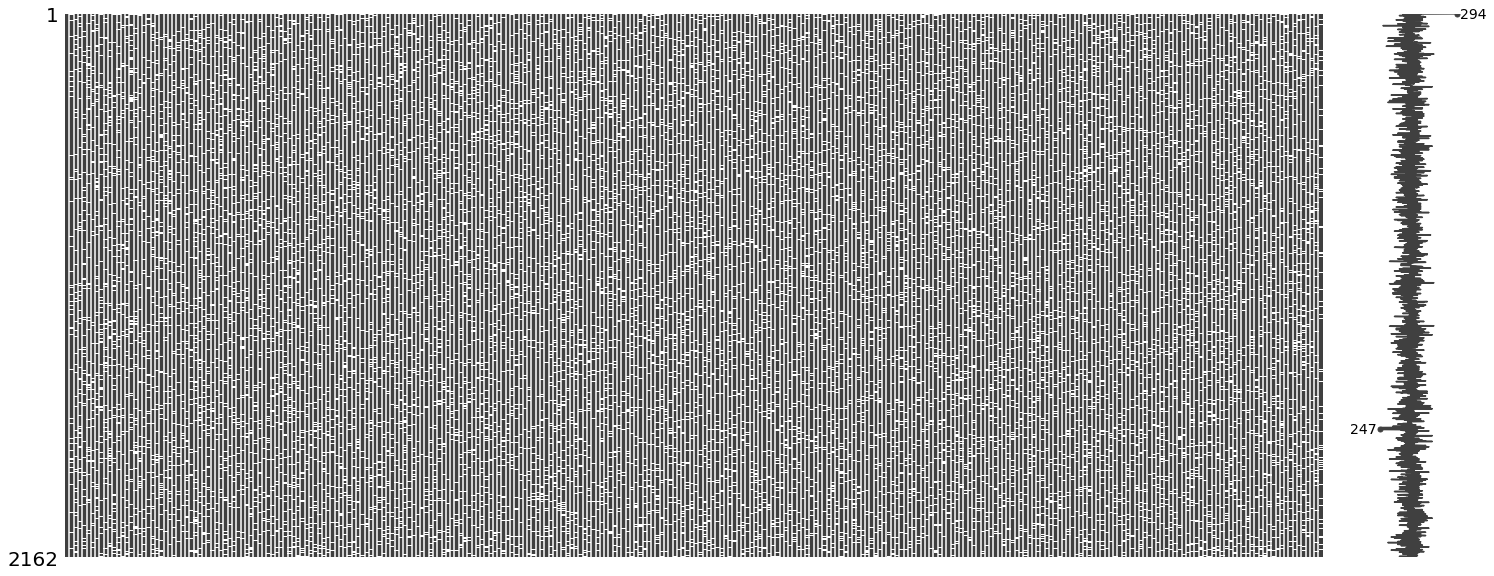

In [474]:
#visualizando missing values
import missingno as msno
msno.matrix(df)

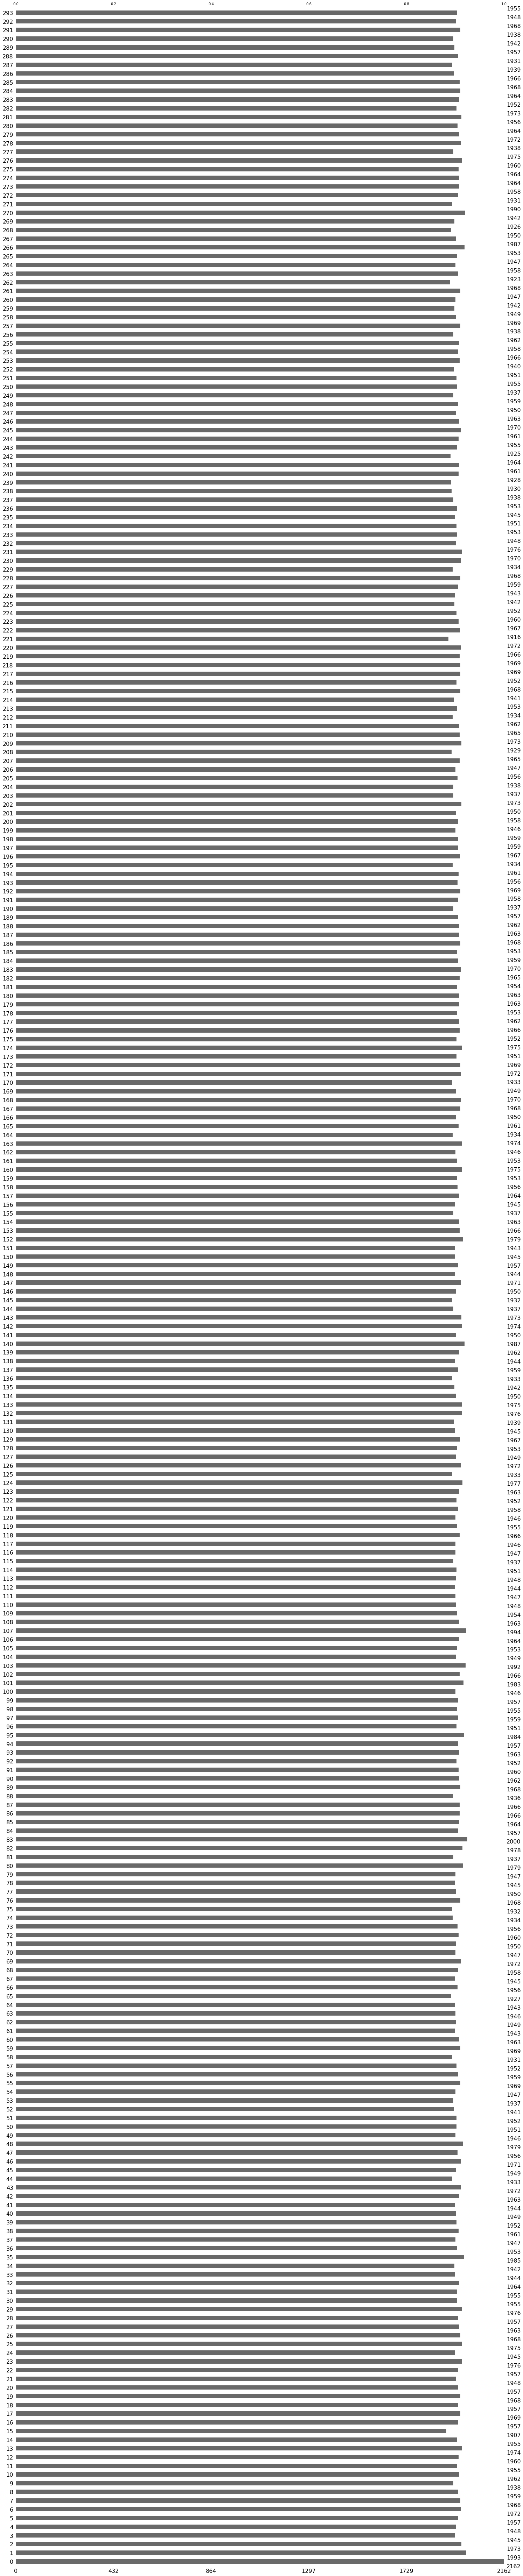

In [475]:
msno.bar(df)

In [476]:
missing_values = (df.isnull().sum()).sum()
missing_values

60388

In [477]:
missing_values = df.isnull().sum()

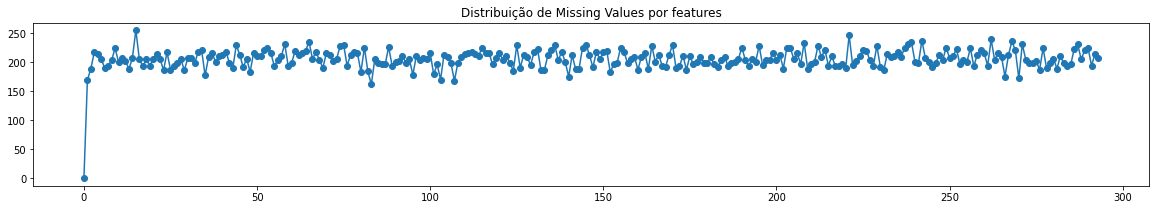

In [478]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,3))
plt.plot(missing_values,marker='o')


plt.title("Distribuição de Missing Values por features")
plt.show()

In [479]:
df.describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293
count,2162.000000,1993.000000,1973.000000,1945.000000,1948.000000,1957.000000,1972.000000,1968.000000,1959.000000,1938.000000,1962.000000,1955.000000,1960.000000,1974.000000,1955.000000,1907.000000,1957.000000,1969.000000,1957.000000,1968.000000,1957.000000,1948.000000,1957.000000,1976.000000,1945.000000,1975.000000,1968.000000,1963.000000,1957.000000,1976.000000,1955.000000,1955.000000,1964.000000,1944.000000,1942.000000,1985.000000,1953.000000,1947.000000,1961.000000,1952.000000,...,1958.000000,1962.000000,1938.000000,1969.000000,1949.000000,1942.000000,1947.000000,1968.000000,1923.000000,1958.000000,1947.000000,1953.000000,1987.000000,1950.000000,1926.000000,1942.000000,1990.000000,1931.000000,1958.000000,1964.000000,1964.000000,1960.000000,1975.000000,1938.000000,1972.000000,1964.000000,1956.000000,1973.000000,1952.000000,1964.000000,1968.000000,1966.000000,1939.000000,1931.000000,1957.000000,1942.000000,1938.000000,1968.000000,1948.000000,1955.000000
mean,0.658930,0.692225,0.715906,0.723873,0.715828,0.691969,0.656272,0.653348,0.687104,0.710115,0.713529,0.707797,0.686270,0.649500,0.603420,0.642575,0.660595,0.667847,0.659813,0.637115,0.606112,0.554463,0.588627,0.606477,0.617177,0.606967,0.583097,0.558370,0.523710,0.557075,0.577606,0.589706,0.581534,0.559842,0.527257,0.506717,0.539963,0.559891,0.568340,0.558955,...,0.135838,0.138133,0.143261,0.137353,0.136148,0.151363,0.156440,0.167500,0.175524,0.168673,0.169894,0.154174,0.167394,0.178825,0.183019,0.181797,0.183696,0.176936,0.164333,0.155813,0.167564,0.174346,0.176498,0.171259,0.166913,0.155753,0.136487,0.139312,0.152008,0.152747,0.147608,0.141201,0.133982,0.114715,0.114868,0.118585,0.120156,0.118374,0.112775,0.110919
std,0.214446,0.199902,0.189667,0.185475,0.188166,0.202232,0.220827,0.199089,0.179091,0.166507,0.162615,0.161498,0.177771,0.202183,0.200897,0.178103,0.163155,0.158568,0.165419,0.176766,0.196773,0.199223,0.180664,0.166945,0.162347,0.166585,0.184983,0.196286,0.210331,0.188199,0.176077,0.175812,0.183193,0.194602,0.213014,0.222367,0.206865,0.198831,0.199098,0.205549,...,0.193949,0.194079,0.199471,0.197830,0.199054,0.196588,0.195011,0.206549,0.213098,0.203551,0.208817,0.199550,0.203026,0.209293,0.212004,0.214943,0.221231,0.210802,0.200197,0.188839,0.197971,0.205800,0.204045,0.201180,0.198973,0.191251,0.171120,0.164194,0.185574,0.176608,0.174415,0.169762,0.168871,0.154686,0.154003,0.159334,0.160372,0.156602,0.149816,0.151044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000122,0.000020,0.000020,0.000205,0.000000,0.000000,0.000262,0.000154,0.000007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.534204,0.575505,0.612255,0.617537,0.610587,0.582970,0.534447,0.540612,0.581497,0.612443,0.622578,0.611884,0.585615,0.535219,0.489938,0.545308,0.568140,0.576593,0.568039,0.537284,0.498030,0.435038,0.482646,0.508079,0.527364,0.512266,0.473180,0.444737,0.386317,0.434930,0.469616,0.491521,0.475449,0.446863,0.389179,0.358704,0.404636,0.438458,0.446902,0.438669,...,0.014632,0.014379,0.014899,0.013148,0.011439,0.022793,0.026701,0.030213,0.033179,0.031282,0.030517,0.023618,0.033388,0.039032,0.038888,0.040142,0.039021,0.038319,0.031604,0.034464,0.037408,0.039561,0.04

In [480]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293
0,0.646467,0.666435,0.685047,0.699053,0.652746,0.407864,0.150309,0.535193,0.555689,0.580782,0.577094,0.390455,0.242458,0.170217,0.421797,0.428206,0.428277,0.490017,0.459252,0.350897,0.255987,0.310109,0.375018,0.437369,0.451752,0.508325,0.467347,0.567068,0.546262,0.566969,0.612951,0.621101,0.653561,0.694546,0.574777,0.710196,0.614510,0.590450,0.508313,0.645884,...,0.185948,0.412370,0.204738,0.083212,0.096029,0.026930,0.069331,0.136652,0.136285,0.127585,0.249868,0.545665,0.252143,0.261571,0.203095,0.172747,0.23903,0.309251,0.090241,0.048767,0.085062,0.072274,0.167601,0.094636,0.258751,0.092845,0.477150,0.224848,0.102568,0.329816,0.061538,0.049615,0.068962,0.653879,0.354982,0.124074,0.157332,0.247298,0.014025,0.029709
1,0.770156,0.767255,0.761053,NaN,0.742231,0.688086,0.708416,0.757351,0.760633,0.740314,NaN,0.600421,0.542340,0.439594,0.604272,0.624697,0.642823,0.424883,NaN,0.318076,0.209851,NaN,0.599071,0.556610,0.556215,0.653352,0.559962,0.473784,0.636677,0.653249,0.621813,0.613890,NaN,0.596297,0.692224,0.634007,0.605896,0.594992,NaN,0.582844,...,0.016475,0.159426,0.131570,0.138887,0.170231,0.070917,0.088278,0.097577,0.167246,0.193839,0.283507,0.190554,0.072342,0.111906,NaN,0.178064,0.24989,0.085085,0.073259,0.133331,0.090761,0.138334,0.102932,0.406639,0.126982,0.046562,0.354085,0.199359,NaN,0.051859,0.114123,0.160008,0.414088,0.361843,NaN,0.176387,0.251454,0.137833,0.082672,0.036320


In [481]:
#Instalando o panda profile
#!pip install pandas-profiling
#from pandas_profiling import ProfileReport

#Imputação de dados


*   k-Nearest Neighbors (kNN) Imputation
*   Random Forest Imputation (MissForest)
*   mean
*   most_frequent
*   median







Library Missingpy

**missingpy** is a library for missing data imputation in Python. It has an API consistent with scikit-learn, so users already comfortable with that interface will find themselves in familiar terrain. Currently, the library supports k-Nearest Neighbors based imputation and Random Forest based imputation (MissForest) but we plan to add other imputation tools in the future so please stay tuned!

In [482]:
#installing
!pip install missingpy

# Criação da popoulação inicial

imputando os indivíduos

In [483]:
#!pip install -U scikit-learn

In [484]:
#!pip install sklearn
#import sklearn
#from sklearn import neighbors

In [485]:
import sklearn.neighbors._base
import sys

sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [486]:
from sklearn.impute import SimpleImputer

In [487]:
#def knnImp(dataset_amputed):
#  from missingpy import KNNImputer
#  imputer_knn = KNNImputer(missing_values="NaN", n_neighbors=5, weights="uniform", 
#                 metric="masked_euclidean", row_max_missing=0.5, 
#                 col_max_missing=0.8, copy=True)
  
  #X_imputed_KNNI = imputer_knn.fit_transform(dataset_amputed)
  #return X_imputed_KNNI

In [488]:
from sklearn.impute import KNNImputer
def knnImp(dataset_amputed,neighbors):
  inputer_knn = KNNImputer(n_neighbors=neighbors)
  X_imputed_knn = inputer_knn.fit_transform(dataset_amputed)
  return X_imputed_knn

In [489]:
def rfImp(dataset_amputed):
  from missingpy import MissForest
  imputer_RFI = MissForest()
  X_imputed_RFI = imputer_RFI.fit_transform(dataset_amputed)
  return X_imputed_RFI

In [490]:
def meanImp(dataset_amputed):
  imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
  imputer_mean=imputer_mean.fit(dataset_amputed)
  X_imputed_mean = imputer_mean.transform(dataset_amputed)
  return X_imputed_mean

In [491]:
def mostFrequentImp(dataset_amputed):
  imputer_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  imputer_most_frequent=imputer_most_frequent.fit(dataset_amputed)
  X_imputed_most_frequent=imputer_most_frequent.transform(dataset_amputed)
  return X_imputed_most_frequent

In [492]:
def medianImp(dataset_amputed):
  imputer_median = SimpleImputer(missing_values=np.nan, strategy='median')
  imputer_median=imputer_median.fit(df_median)
  X_imputed_median=imputer_median.transform(df_median)
  return X_imputed_median

Padronização dos dados

In [493]:
df_Mean = df
df_median = df
df_Most_frequent = df
df_kNN = df
df_RF = df

In [494]:
ind1 =  meanImp(df_Mean)
ind2 =  medianImp(df_median)
ind3 =  mostFrequentImp(df_Most_frequent)


In [495]:
ind4 = knnImp(df_kNN, 3)
ind5 = knnImp(df_kNN, 5)
ind6 = knnImp(df_kNN, 10)

In [496]:
#dataset_amputed - base já com valores ausentes
#imputation_type - list de métodos de iputação simples ['kNN', 'RF', 'mean', 'most_frequent', 'median']
#imputations = ['kNN', 'RF', 'mean', 'most_frequent', 'median']
#dfs = ['df_kNN', 'df_RF', 'df_Mean', 'df_Most_frequent', 'df_median']

#cópias do database aputudo para cada método no formação da pop. inicial









individuos = [ind1, ind2, ind3, ind4, ind5, ind6]


In [497]:
len(individuos)

6

Normmalização da população inicial

In [498]:
populationInitial = []
for i in range(len(individuos)):
  scaler = StandardScaler()
  populationInitial.append(scaler.fit_transform(individuos[i]))

In [499]:
populationInitial

[array([[-5.81283411e-02, -1.34407286e-01, -1.70357796e-01, ...,
          8.63097149e-01, -6.94582383e-01, -5.65550949e-01],
        [ 5.18787674e-01,  3.91021223e-01,  2.49238230e-01, ...,
          1.30268251e-01, -2.11738196e-01, -5.19511474e-01],
        [ 6.29927345e-01,  4.16250338e-01,  2.53472503e-01, ...,
         -4.50210698e-01, -1.89401487e-03, -1.06310493e-15],
        ...,
        [ 1.01145340e+00,  1.09144317e+00,  1.16109195e+00, ...,
          1.07939431e+00,  9.96240937e-01,  1.63176428e-01],
        [ 1.36826361e+00,  1.31728049e+00,  1.04697636e+00, ...,
         -5.78915175e-01, -6.69809600e-01, -6.35017559e-01],
        [ 1.04973754e+00,  1.07763777e+00,  1.02192956e+00, ...,
          9.22411670e-01,  7.98726878e-01,  7.81028827e-01]]),
 array([[-0.05812834, -0.14536908, -0.18150877, ...,  0.89153987,
         -0.65365088, -0.52501978],
        [ 0.51878767,  0.3796804 ,  0.23780929, ...,  0.16284825,
         -0.17377056, -0.47927706],
        [ 0.62992735,  0.

# Função Fitness

Os indivíduos da população são avaliados no aprendizado multirrótulo.
Neste experimento, serão testados algorítmos que transformam o problema e algorítmos que adaptam o problema.

In [500]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

def evaluation_binaryRelevance(core_algorithm, individual):
  if core_algorithm == 'svm':
    classifier_br = BinaryRelevance(
    classifier=SVC(C=50.0))#
    classifier_br.fit(individual, y_train)
    prediction_br = classifier_br.predict(X_test)

    F1 = f1_score(y_test, prediction_br, average='micro')
    ACC = accuracy_score(y_test, prediction_br)
    HL = hamming_loss(y_test, prediction_br)

  elif core_algorithm == 'randomForest':
    classifier = BinaryRelevance(classifier = RandomForestClassifier(),require_dense = [False, True])
    classifier.fit(individual, y_train)
    prediction_br_RFC=classifier.predict(X_test)

    F1 = f1_score(y_test, prediction_br_RFC, average='micro')
    ACC = accuracy_score(y_test, prediction_br_RFC)
    HL = hamming_loss(y_test, prediction_br_RFC)
  elif core_algorithm == '3nn':
    classifier = BinaryRelevance(classifier = KNeighborsClassifier(n_neighbors=3))
    classifier.fit(individual, y_train)
    prediction_br_3knn=classifier.predict(X_test)

    F1 = f1_score(y_test, prediction_br_3knn, average='micro')
    ACC = accuracy_score(y_test, prediction_br_3knn)
    HL = hamming_loss(y_test, prediction_br_3knn)
  elif core_algorithm == '5nn':
    classifier = BinaryRelevance(classifier = KNeighborsClassifier())
    classifier.fit(individual, y_train)
    prediction_br_5knn=classifier.predict(X_test)

    F1 = f1_score(y_test, prediction_br_5knn, average='micro')
    ACC = accuracy_score(y_test, prediction_br_5knn)
    HL = hamming_loss(y_test, prediction_br_5knn)
  elif core_algorithm == '10nn':
    classifier = BinaryRelevance(classifier = KNeighborsClassifier(n_neighbors=10))
    classifier.fit(individual, y_train)
    prediction_br_10knn=classifier.predict(X_test)

    F1 = f1_score(y_test, prediction_br_10knn, average='micro')
    ACC = accuracy_score(y_test, prediction_br_10knn)
    HL = hamming_loss(y_test, prediction_br_10knn) 
  elif core_algorithm == 'lr':
    from sklearn.linear_model import LogisticRegression
    classifier = BinaryRelevance(classifier = LogisticRegression())
    classifier.fit(individual, y_train)
    prediction_br_lr=classifier.predict(X_test)

    F1 = f1_score(y_test, prediction_br_lr, average='micro')
    ACC = accuracy_score(y_test, prediction_br_lr)
    HL = hamming_loss(y_test, prediction_br_lr)
  return  ACC

Não executando Random Forest devido também ser um algorítmo que funciona como bagging

In [501]:
def fitness(populationInitial):
  metrica = []
  populacao = []
  aval_lista_descrecente = []
  aval_lista_crescente = []
  indivuduos = {}
  accuracy = {}
  #population_atual = []
  #population_atual.append(populationAtual)
  print('tam_pop_atual: ',len(populationInitial))

  print('Avaliações com Binary Relevance\n')
  indexx = 0
  for i in range(len(populationInitial)):
    print('Individual - ',i)
    
    #F_svm,A_svm,H_svm = evaluation_binaryRelevance('svm', populationAtual[indexx])
    #F_RF,A_RF,H_RF = evaluation_binaryRelevance('randomForest', populationAtual[indexx])
    #F_3nn,A_3nn,H_3nn = evaluation_binaryRelevance('3nn', populationAtual[indexx])
    #F_5nn,A_5nn,H_5nn = evaluation_binaryRelevance('5nn', populationAtual[indexx])
    #F_10nn,A_10nn,H_10nn = evaluation_binaryRelevance('10nn', populationAtual[indexx])
    metrica.append(evaluation_binaryRelevance('svm', populationInitial[indexx]))
    metrica.append(evaluation_binaryRelevance('randomForest', populationInitial[indexx]))
    metrica.append(evaluation_binaryRelevance('3nn', populationInitial[indexx]))
    metrica.append(evaluation_binaryRelevance('5nn', populationInitial[indexx]))
    metrica.append(evaluation_binaryRelevance('10nn', populationInitial[indexx]))
    #acc.append(evaluation_binaryRelevance('10nn', populationInitial[indexx]))
    
    
    #print(populationInitialScale[i])
    aval_lista_descrecente = sorted(metrica, reverse=True)
    #print(aval_lista_descrecente)
    aval_lista_crescente = sorted(metrica)
    #print(aval_lista_crescente)

    melhor = aval_lista_descrecente[0]
    pior = aval_lista_crescente[0]

    populacao.append([melhor, populationInitial[indexx]])

    indivuduos[i] = melhor
    indexx = indexx+1
    print('Pior:', pior, ' melhor:', melhor, ' escolhido: ', melhor)
    print('----------------------------------------------------')
    melhor = ''
    pior = ''
    aval_lista_descrecente = []
    aval_lista_crescente = []
    metrica = []
  return populacao



In [502]:
populacao_inicial_avaliada = fitness(populationInitial)

tam_pop_atual:  6
Avaliações com Binary Relevance

Individual -  0
Pior: 0.5428571428571428  melhor: 0.689795918367347  escolhido:  0.689795918367347
----------------------------------------------------
Individual -  1
Pior: 0.5673469387755102  melhor: 0.6653061224489796  escolhido:  0.6653061224489796
----------------------------------------------------
Individual -  2
Pior: 0.5224489795918368  melhor: 0.6612244897959184  escolhido:  0.6612244897959184
----------------------------------------------------
Individual -  3
Pior: 0.5346938775510204  melhor: 0.6775510204081633  escolhido:  0.6775510204081633
----------------------------------------------------
Individual -  4
Pior: 0.5387755102040817  melhor: 0.6775510204081633  escolhido:  0.6775510204081633
----------------------------------------------------
Individual -  5
Pior: 0.5469387755102041  melhor: 0.673469387755102  escolhido:  0.673469387755102
----------------------------------------------------


In [503]:
populacao_inicial_avaliada

[[0.689795918367347,
  array([[-5.81283411e-02, -1.34407286e-01, -1.70357796e-01, ...,
           8.63097149e-01, -6.94582383e-01, -5.65550949e-01],
         [ 5.18787674e-01,  3.91021223e-01,  2.49238230e-01, ...,
           1.30268251e-01, -2.11738196e-01, -5.19511474e-01],
         [ 6.29927345e-01,  4.16250338e-01,  2.53472503e-01, ...,
          -4.50210698e-01, -1.89401487e-03, -1.06310493e-15],
         ...,
         [ 1.01145340e+00,  1.09144317e+00,  1.16109195e+00, ...,
           1.07939431e+00,  9.96240937e-01,  1.63176428e-01],
         [ 1.36826361e+00,  1.31728049e+00,  1.04697636e+00, ...,
          -5.78915175e-01, -6.69809600e-01, -6.35017559e-01],
         [ 1.04973754e+00,  1.07763777e+00,  1.02192956e+00, ...,
           9.22411670e-01,  7.98726878e-01,  7.81028827e-01]])],
 [0.6653061224489796,
  array([[-0.05812834, -0.14536908, -0.18150877, ...,  0.89153987,
          -0.65365088, -0.52501978],
         [ 0.51878767,  0.3796804 ,  0.23780929, ...,  0.16284825,
 

# Elitismo
O melhor individuo é passado para a proxima geracao - Elitismo

In [504]:
def elitismo(populacao_avaliada):
  #ordena a população passada de forma descrescente
  populacao_ordenada  = sorted(populacao_avaliada, key=lambda x: x[0], reverse=True)
  elitista = populacao_ordenada[0]
  return elitista

In [505]:
elitista = elitismo(populacao_inicial_avaliada)

In [506]:
elitista

[0.689795918367347,
 array([[-5.81283411e-02, -1.34407286e-01, -1.70357796e-01, ...,
          8.63097149e-01, -6.94582383e-01, -5.65550949e-01],
        [ 5.18787674e-01,  3.91021223e-01,  2.49238230e-01, ...,
          1.30268251e-01, -2.11738196e-01, -5.19511474e-01],
        [ 6.29927345e-01,  4.16250338e-01,  2.53472503e-01, ...,
         -4.50210698e-01, -1.89401487e-03, -1.06310493e-15],
        ...,
        [ 1.01145340e+00,  1.09144317e+00,  1.16109195e+00, ...,
          1.07939431e+00,  9.96240937e-01,  1.63176428e-01],
        [ 1.36826361e+00,  1.31728049e+00,  1.04697636e+00, ...,
         -5.78915175e-01, -6.69809600e-01, -6.35017559e-01],
        [ 1.04973754e+00,  1.07763777e+00,  1.02192956e+00, ...,
          9.22411670e-01,  7.98726878e-01,  7.81028827e-01]])]

# Seleção

O processo de seleçãp é dado por torneio, sorteando dois pais

In [507]:
import random
def selecao(pop_atual):
  sorteio1 = random.choice(range(len(pop_atual)))
  #print(sorteio1)
  sorteio2 = random.choice(range(len(pop_atual)))
  #print(sorteio2)
  pai1 = pop_atual[sorteio1]
  pai2 = pop_atual[sorteio2]
  #print(pai1[0])
  #print(pai2[0])

  if(pai1[0] >= pai2[0]):
    return pai1
  else:
    return pai2

#Cruzamento

Cruzamento de n-points

In [508]:
#indeces com a posição do valores ausentes
index_vas = indexList

In [509]:
import numpy
ss = index_vas
final_list = numpy.array_split(ss,2);
final_list

[array([[1602,   10],
        [1405,  269],
        [ 905,  228],
        ...,
        [2124,  155],
        [1865,  281],
        [2003,  175]]), array([[ 394,  205],
        [1266,  170],
        [1909,  193],
        ...,
        [1993,  202],
        [1821,  120],
        [ 927,  278]])]

In [510]:
len(ss), len(final_list[0]),len(final_list[1]) 

(63562, 31781, 31781)

In [511]:
#indices dos missing values
#indexList[0]
#for i in indexList:
#  df.iloc[indexList[0][0],indexList[0][1]] = np.nan

In [512]:
import numpy

def crossover(list_index_vas,n_points, new_population, tam_population):
  nova_populacao_com_crossover = []
  #elitista = new_population[0]
  #nova_populacao_com_crossover.append(elitista[1])

  while(len(nova_populacao_com_crossover)<tam_population):
    sorteio1 = random.choice(range(len(new_population)))
    #escolha dos pais que terão materiais trocados
    #print(sorteio1)
    sorteio2 = random.choice(range(len(new_population)))
    #print(sorteio2)
    while(sorteio1 == sorteio2):
      sorteio2 = random.choice(range(len(new_population)))
    pai1 = new_population[sorteio1]
    pai2 = new_population[sorteio2]

    #print(pai1[0])
    #print(pai2[0])
    #troca de material genético
    #mudando pra dataframe

    df_pai1 = pd.DataFrame(pai1[1])
    df_pai2 = pd.DataFrame(pai2[1])

    
    genes_all_pai1 = []

    genes_all_pai2 = []


    #recuperando os genes de cada pai
    for i in list_index_vas:
      genes_all_pai1.append(df_pai1.iloc[i[0],i[1]])
      genes_all_pai2.append(df_pai2.iloc[i[0],i[1]])
    #dividindo os genes de acordo com o n_points
    divide_genes_pai_1 = numpy.array_split(genes_all_pai1,n_points)
    divide_genes_pai_2 = numpy.array_split(genes_all_pai2,n_points)

    genes_0_pai1 = divide_genes_pai_1[0]
    genes_1_pai1 = divide_genes_pai_1[1]

    genes_0_pai2 = divide_genes_pai_2[0]
    genes_1_pai2 = divide_genes_pai_2[1]

    t1 = len(genes_1_pai1)
    t2 = len(genes_1_pai2)

    divide_list_index = numpy.array_split(list_index_vas,n_points)
    primeira_parte = divide_list_index[0]
    segunda_parte = divide_list_index[1]

    genes_parte_2_pai1 = genes_1_pai1.tolist()
    genes_parte_2_pai2 = genes_1_pai2.tolist()

    #Trocando genes dos pais
    index = 0
    for i in segunda_parte:

      #print('pai1: ',df_pai1.iloc[i[0].astype(int), i[1].astype(int)])
      #print('pai2: ',df_pai2.iloc[i[0].astype(int), i[1].astype(int)])
      #print('------------------------------------------------------')


      df_pai1.iloc[i[0].astype(int), i[1].astype(int)] = genes_1_pai2[index]
      df_pai2.iloc[i[0].astype(int), i[1].astype(int)] = genes_1_pai1[index]

      #print('filho1: ',df_pai1.iloc[i[0].astype(int), i[1].astype(int)])
      #print('filho2: ',df_pai2.iloc[i[0].astype(int), i[1].astype(int)])
      #print('------------------------------------------------------')
      #print('Gene pai1: ',genes_1_pai1[index] )
      #print('Gene pai2: ',genes_1_pai2[index] )
      #print('--------------------------------------------------------')
      #print('--------------------------------------------------------')
      index = index +1
      
      

    filho1 = df_pai1
    filho2 = df_pai2
    nova_populacao_com_crossover.append(filho1.to_numpy())
    nova_populacao_com_crossover.append(filho2.to_numpy())

    

  

  #filho1, filho2,pai1[1],pai1[2]
  print('pop_cruzada',len(nova_populacao_com_crossover))
  return nova_populacao_com_crossover

In [513]:
#nova_populacao_recombinada = crossover(ss,2,atual,4)

# Mutação

In [514]:
def mutacao(dX_amputed,ind, list_missing_values=index_vas):
  import random
  #de numpy para pandas format
  ind = pd.DataFrame(ind)
  #serão selecionados x% de individuos da população e são trocadas todas as solucões
  #candidatas já imputadas por uma nova solução da pool de soluções
  #amount_inds_mutation = int(rate_mutation *  len(inds_pop))
  for i in list_missing_values:
    #criando um pool solutions de acordo com a o valor de x da lista de index
    lista_do_indice_atual = dX_amputed.iloc[:,i[1]]
    #removendo o indices NaN para criar a pool solutions só com soluções candatas não-nulas
    pool_solutions = [x for x in lista_do_indice_atual if pd.isnull(x) == False]
    
    
    #substituindo o gene do indivíduo por um dos genes da pool solutions
    #print('index: ', i[0],',', i[1])
    #print('antes: ',ind.iloc[i[0],i[1]])
    ind.iloc[i[0],i[1]] = random.choice(pool_solutions)
    #print('depois: ',ind.iloc[i[0],i[1]])
  return ind.to_numpy()


In [515]:
#ind = mutacao(df_amp)

In [516]:
def mutations(dX_amputed,population, rate_mutation):
  populacao_cruzada = population.copy()
  amount_inds_mutation = int(rate_mutation *  len(populacao_cruzada))
  i = 0
  while(i < amount_inds_mutation):
    ind_escolhido_pra_mutacao = populacao_cruzada.pop(i)
    ind_mutado = mutacao(dX_amputed, ind_escolhido_pra_mutacao)
    populacao_cruzada.append(ind_mutado)
    i=i+1
  return populacao_cruzada

In [517]:
populationInitial[0]

array([[-5.81283411e-02, -1.34407286e-01, -1.70357796e-01, ...,
         8.63097149e-01, -6.94582383e-01, -5.65550949e-01],
       [ 5.18787674e-01,  3.91021223e-01,  2.49238230e-01, ...,
         1.30268251e-01, -2.11738196e-01, -5.19511474e-01],
       [ 6.29927345e-01,  4.16250338e-01,  2.53472503e-01, ...,
        -4.50210698e-01, -1.89401487e-03, -1.06310493e-15],
       ...,
       [ 1.01145340e+00,  1.09144317e+00,  1.16109195e+00, ...,
         1.07939431e+00,  9.96240937e-01,  1.63176428e-01],
       [ 1.36826361e+00,  1.31728049e+00,  1.04697636e+00, ...,
        -5.78915175e-01, -6.69809600e-01, -6.35017559e-01],
       [ 1.04973754e+00,  1.07763777e+00,  1.02192956e+00, ...,
         9.22411670e-01,  7.98726878e-01,  7.81028827e-01]])

In [518]:
a = populationInitial.pop(0)

In [519]:
a

array([[-5.81283411e-02, -1.34407286e-01, -1.70357796e-01, ...,
         8.63097149e-01, -6.94582383e-01, -5.65550949e-01],
       [ 5.18787674e-01,  3.91021223e-01,  2.49238230e-01, ...,
         1.30268251e-01, -2.11738196e-01, -5.19511474e-01],
       [ 6.29927345e-01,  4.16250338e-01,  2.53472503e-01, ...,
        -4.50210698e-01, -1.89401487e-03, -1.06310493e-15],
       ...,
       [ 1.01145340e+00,  1.09144317e+00,  1.16109195e+00, ...,
         1.07939431e+00,  9.96240937e-01,  1.63176428e-01],
       [ 1.36826361e+00,  1.31728049e+00,  1.04697636e+00, ...,
        -5.78915175e-01, -6.69809600e-01, -6.35017559e-01],
       [ 1.04973754e+00,  1.07763777e+00,  1.02192956e+00, ...,
         9.22411670e-01,  7.98726878e-01,  7.81028827e-01]])

# Algoritmo Genético



1.   elitisimo: 1
2.   gerações: 6
3.   geracoes_sizes{6,12,18,24,30}
4.   cruzamento: n-points
5.   cruzamento: torneio



In [520]:
def nova_populacao(df_amp,individuo_elitista, pop_atual, tam_population,n_points, list_index_vas=index_vas):
  formacao_nova_populacao = []
  formacao_nova_populacao.append(individuo_elitista)
  while(len(formacao_nova_populacao)<= tam_population):
    formacao_nova_populacao.append(selecao(pop_atual))
  #pega a população selecionada para fazer a recombinação
  nova_populacao_combinada = crossover(list_index_vas,n_points, formacao_nova_populacao, tam_population)
  #20% dos individuos sofrem mutações
  #a nova populacao combinada é passada como parametro
  populacao_cruzada_e_mutada = mutations(df_amp,nova_populacao_combinada, 0.20)

  return populacao_cruzada_e_mutada

In [521]:
def main(gen_sizes):
  melhor = elitista
  otimizacao = []
  otimizacao.append(melhor)
  #populacao inicial
  populacao_inicial = populacao_inicial_avaliada
  for i in gen_sizes:
    print('tamanho da população atual',len(populacao_inicial))
    #Cria nova populacao
    n_pop = nova_populacao(df_amp, melhor, populacao_inicial, i,2)
    #avalia populacao formada
    
    populacao_atual_avaliada = fitness(n_pop)
    #print(n_pop[0])
    #passando o melhor elitista
    #print(melhor)
    populacao_inicial = []
    melhor_atual  = elitismo(populacao_atual_avaliada)
    if (melhor_atual[0]>melhor[0]):
      otimizacao.append(melhor_atual)
      #populacao_inicial.append(melhor_atual)
      melhor = melhor_atual
      print('Novo melhor:',melhor_atual[0])
    else:
      populacao_atual_avaliada.pop(len(populacao_atual_avaliada)-1)
      otimizacao.append(melhor)
      populacao_inicial.append(melhor)
      print('melhor anterior foi escolhido: ',melhor[0])
    populacao_inicial.extend(populacao_atual_avaliada)
    print(len(populacao_inicial))
    ##populancao anterior recebe a nova população avliada
    


  return otimizacao, len(n_pop)


# Running

In [522]:
gen_sizes = [8,10,12,14,16,18]#[10,20,40,20,10,5]
result,p = main(gen_sizes)
result

tamanho da população atual 6
pop_cruzada 8
tam_pop_atual:  8
Avaliações com Binary Relevance

Individual -  0
Pior: 0.5306122448979592  melhor: 0.6816326530612244  escolhido:  0.6816326530612244
----------------------------------------------------
Individual -  1
Pior: 0.5346938775510204  melhor: 0.6816326530612244  escolhido:  0.6816326530612244
----------------------------------------------------
Individual -  2
Pior: 0.5224489795918368  melhor: 0.673469387755102  escolhido:  0.673469387755102
----------------------------------------------------
Individual -  3
Pior: 0.5265306122448979  melhor: 0.6816326530612244  escolhido:  0.6816326530612244
----------------------------------------------------
Individual -  4
Pior: 0.5306122448979592  melhor: 0.673469387755102  escolhido:  0.673469387755102
----------------------------------------------------
Individual -  5
Pior: 0.5183673469387755  melhor: 0.6816326530612244  escolhido:  0.6816326530612244
---------------------------------------

[[0.689795918367347,
  array([[-0.05812834, -0.13440729, -0.1703578 , ...,  0.86309715,
          -0.69458238, -0.56555095],
         [ 0.51878767,  0.39102122,  0.24923823, ...,  0.13026825,
          -0.2117382 , -0.51951147],
         [ 0.62992735,  0.41625034,  0.2534725 , ..., -0.4502107 ,
          -0.00189401,  0.121125  ],
         ...,
         [ 1.0114534 ,  1.09144317,  1.16109195, ...,  1.07939431,
           0.99624094,  0.16317643],
         [ 1.36826361,  1.31728049,  1.04697636, ..., -0.57891518,
          -0.6698096 , -0.63501756],
         [ 1.04973754,  1.07763777,  1.02192956, ...,  0.92241167,
           0.79872688,  0.78102883]])],
 [0.689795918367347,
  array([[-0.05812834, -0.13440729, -0.1703578 , ...,  0.86309715,
          -0.69458238, -0.56555095],
         [ 0.51878767,  0.39102122,  0.24923823, ...,  0.13026825,
          -0.2117382 , -0.51951147],
         [ 0.62992735,  0.41625034,  0.2534725 , ..., -0.4502107 ,
          -0.00189401,  0.121125  ],
     

In [523]:
p

18

In [524]:
dados = []
for i in result:
  dados.append(i[0])

In [525]:
dados

[0.689795918367347,
 0.689795918367347,
 0.689795918367347,
 0.689795918367347,
 0.689795918367347,
 0.689795918367347,
 0.689795918367347]

In [526]:
geracoes = pd.DataFrame({'geracoes':dados})

In [527]:
geracoes

,geracoes
0,0.689796
1,0.689796
2,0.689796
3,0.689796
4,0.689796
5,0.689796
6,0.689796


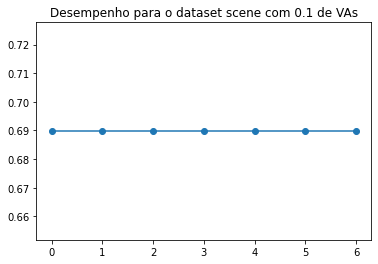

In [528]:
import matplotlib.pyplot as plt 
plt.figure()#figsize=(20,3)
plt.plot(geracoes,marker='o')
title = 'Desempenho para o dataset '+ dataset_name +' com '+ str(taxa_de_missing_values)+' de VAs'
plt.title(title)
plt.show()

###Teste isolado para avaliar o desempenho do dataset original e sem missing values e com outros classificadores

In [529]:
sc = StandardScaler()
sc = sc.fit_transform(X_train.toarray())
Arf= evaluation_binaryRelevance('randomForest', sc)
Asvm = evaluation_binaryRelevance('svm', sc)
print('SVM:           ',Asvm) 
print('Random Forest: ',Arf) 

SVM:            0.7061224489795919
Random Forest:  0.5591836734693878
